In [40]:
from bs4 import BeautifulSoup
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!pip install konlpy
from konlpy.tag import Kkma
tokenizer=Kkma()

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/23_2se_textmining/teamproject/대통령_취임사.csv'

import pandas as pd


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [41]:
# CSV 파일 읽기
df = pd.read_csv(file_path)

# 특정 열 두 개 선택
selected_df = df[['대통령', '연설내용']] # 실제 열 이름으로 수정 필요

from konlpy.tag import Kkma
kkma = Kkma()

In [42]:
# NaN 값을 제거
selected_df = selected_df.dropna(subset=['연설내용'])

# '연설내용' 열을 문자열로 변환
selected_df['연설내용'] = selected_df['연설내용'].astype(str)

# 특수 문자 제거 (한글과 공백만 남기기)
selected_df['연설내용'] = selected_df['연설내용'].apply(lambda x: re.sub('[^가-힣\s]', '', x))


# '대통령' 열을 기준으로 데이터 그룹화
grouped = selected_df.groupby('대통령')


# 각 대통령별 연설문 토크나이징
tokenized_data = {}
for president, group in grouped:
    tokenized_texts = group['연설내용'].apply(lambda x: kkma.morphs(x))
    tokenized_data[president] = tokenized_texts.tolist()

# 결과 출력
for president, tokens in tokenized_data.items():
    print(f'대통령: {president}')
    for token_list in tokens:
        print(token_list)

대통령: 김대중
['존경', '하', '고', '사랑', '하', '는', '국민', '여러분', '오늘', '저', '는', '대한민국', '제대', '대통령', '에', '취임', '하', '게', '되', '었', '습니다', '정부', '수립', '년', '만', '에', '처음', '이루어지', 'ㄴ', '여야', '간', '정권', '교체', '를', '여러분', '과', '함께', '기뻐하', '면서', '온갖', '시련', '과', '장벽', '을', '넘', '어', '진정', '하', 'ㄴ', '국민', '의', '정부', '를', '탄생', '시키', 'ㄴ', '국민', '여러분', '께', '찬양', '과', '감사', '의', '말씀', '을', '드리', '는', '바', '이', 'ㅂ니다', '그리고', '저의', '취임', '을', '축하', '하', '기', '위하', '어', '이', '자리', '에', '함께', '하', '어', '주신', '김영삼', '전임', '대통령', '폰', '바', '이체', '커', '어', '독일', '전', '대통령', '코', '라', '손', '아키노', '필리핀', '전', '대통령', '후안', '안', '토니오', '사마', '란', '치', '위원장', '등', '내외', '귀빈', '을', '비롯', '하', 'ㄴ', '참석자', '여러분', '께', '도', '깊이', '감사', '드리', 'ㅂ니다', '오늘', '이', '취임식', '의', '역사적', '이', 'ㄴ', '의미', '는', '참으로', '크', '다고', '하', 'ㄹ', '것', '이', 'ㅂ니다', '오늘', '은', '이', '땅', '에서', '처음', '으로', '민주적', '정권', '교체', '가', '실현', '되', '는', '자랑', '스럽', 'ㄴ', '날', '이', 'ㅂ니다', '또', '하', 'ㄴ', '민주주의', '와', '경제', '를', '동시', '에', '발전', '시키', 

In [60]:
# 파일에서 불용어 불러오기
file_path = '/content/drive/MyDrive/Colab Notebooks/23_2se_textmining/teamproject/한글 불용어.txt'
with open(file_path, 'r', encoding='utf-8') as f:
    file_stopwords = [line.strip() for line in f.readlines()]

# 기본 불용어
basic_stopwords = [
    '읍니', '하', '의', '을', '에', '는', '이', '를', '과', '도', '와', '으로', '에서', '위하','대하','시다', '로', '에게', '라', '만', '게','고자', '로서', '으로서', '다', '때', '것', '곳'
]

# 두 불용어 리스트 합치기
stopwords = file_stopwords + basic_stopwords

# 중복된 불용어 제거
stopwords = list(set(stopwords))

from collections import Counter

pos_frequencies = {}


In [61]:
# 대통령별로 토큰과 해당 토큰의 품사를 묶어서 빈도 계산
for president, token_lists in tokenized_data.items():
    token_pos_counts = Counter()

    for tokens in token_lists:
        pos_tagged_tokens = kkma.pos(" ".join(tokens))

        # 길이가 두 글자 이상이며 불용어에 속하지 않는 토큰만 포함
        filtered_tokens = [
            (token, pos) for token, pos in pos_tagged_tokens
            if len(token) >= 2 and token not in stopwords
        ]

        token_pos_counts.update(filtered_tokens)

    sorted_pos_counts = sorted(token_pos_counts.items(), key=lambda x: x[1], reverse=True)
    pos_frequencies[president] = sorted_pos_counts


In [62]:
# 결과 출력
for president, sorted_pos_counts in pos_frequencies.items():
    for (token, pos), freq in sorted_pos_counts:
        print(f'대통령: {president}, 단어: {token}, 품사: {pos}, 빈도: {freq}')

# 결과 출력
for president, sorted_pos_counts in pos_frequencies.items():
    print(f'대통령: {president}')
    for (token, pos), freq in sorted_pos_counts[:20]:  # 상위 20개만 출력
        print(f'단어: {token}, 품사: {pos}, 빈도: {freq}')
    print("-" * 50)  # 구분선



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
대통령: 박정희, 단어: 정세, 품사: NNG, 빈도: 3
대통령: 박정희, 단어: 단군, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 성조, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 천혜, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 국기, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 으시, 품사: EPH, 빈도: 2
대통령: 박정희, 단어: 반만년, 품사: UN, 빈도: 2
대통령: 박정희, 단어: 국헌, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 준수, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 성단, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 취임, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 선출, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 주신, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 보전, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 생명, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 수호, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 깊이, 품사: MAG, 빈도: 2
대통령: 박정희, 단어: 공복, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 금수강산, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 선조, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 찬란, 품사: XR, 빈도: 2
대통령: 박정희, 단어: 핏줄기, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 고동, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 역정, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 항쟁, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 독립, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 동란, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 물리, 품사: NNG, 빈도: 2
대통령: 박정희, 단어: 우람, 품사: NNG, 빈도: 2
대통령: 

In [63]:
top_nouns_by_president = {}

# 각 대통령별로 'N'으로 시작하는 품사의 토큰만 상위 20개 선택
for president, sorted_pos_counts in pos_frequencies.items():
    top_nouns = [(token, freq) for (token, pos), freq in sorted_pos_counts if pos.startswith('N')]
    top_nouns_by_president[president] = top_nouns

# 결과 출력
for president, top_nouns in top_nouns_by_president.items():
    print(f'대통령: {president}')
    for token, freq in top_nouns:
        print(f'단어: {token}, 빈도: {freq}')
    print('-' * 50)  # 구분선

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
단어: 위험, 빈도: 1
단어: 질병, 빈도: 1
단어: 매진, 빈도: 1
단어: 발판, 빈도: 1
단어: 불안, 빈도: 1
단어: 진자, 빈도: 1
단어: 추세, 빈도: 1
단어: 범위, 빈도: 1
단어: 통제, 빈도: 1
단어: 항체, 빈도: 1
단어: 치료제, 빈도: 1
단어: 검사, 빈도: 1
단어: 역학, 빈도: 1
단어: 조사, 빈도: 1
단어: 신속, 빈도: 1
단어: 치료, 빈도: 1
단어: 원칙, 빈도: 1
단어: 흔들림, 빈도: 1
단어: 불편, 빈도: 1
단어: 감수, 빈도: 1
단어: 주신, 빈도: 1
단어: 감염, 빈도: 1
단어: 지속, 빈도: 1
단어: 우려, 빈도: 1
단어: 경계, 빈도: 1
단어: 대장, 빈도: 1
단어: 아쉬움, 빈도: 1
단어: 사실, 빈도: 1
단어: 형편, 빈도: 1
단어: 전문가, 빈도: 1
단어: 부족, 빈도: 1
단어: 수급, 빈도: 1
단어: 불안정, 빈도: 1
단어: 보태, 빈도: 1
단어: 분량, 빈도: 1
단어: 성년, 빈도: 1
단어: 어린이, 빈도: 1
단어: 내년, 빈도: 1
단어: 고려, 빈도: 1
단어: 전원, 빈도: 1
단어: 당초, 빈도: 1
단어: 당기, 빈도: 1
단어: 의료, 빈도: 1
단어: 활용, 빈도: 1
단어: 서도, 빈도: 1
단어: 장기화, 빈도: 1
단어: 주권, 빈도: 1
단어: 의약품, 빈도: 1
단어: 허브, 빈도: 1
단어: 국경, 빈도: 1
단어: 봉쇄, 빈도: 1
단어: 망이, 빈도: 1
단어: 붕괴, 빈도: 1
단어: 대공황, 빈도: 1
단어: 최악, 빈도: 1
단어: 침체, 빈도: 1
단어: 수요, 빈도: 1
단어: 실물, 빈도: 1
단어: 금융, 빈도: 1
단어: 위축, 빈도: 1
단어: 복합, 빈도: 1
단어: 직면, 빈도: 1
단어: 활동, 빈도: 1
단어: 영업, 빈도: 1
단어: 제한, 빈도: 1
단어: 대량, 빈도: 1
단어: 실업, 빈도: 1
단어: 초유, 빈도: 1
단어:

In [64]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

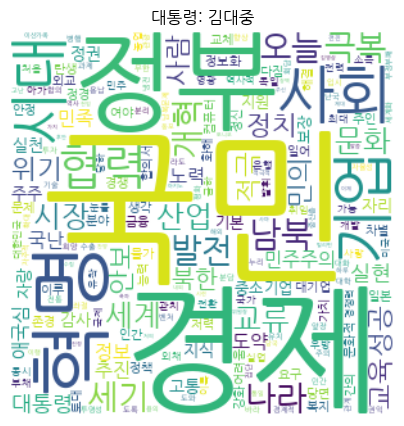

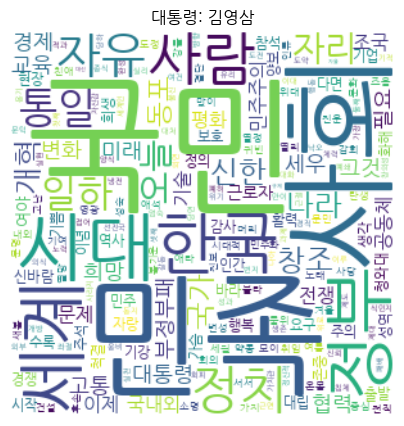

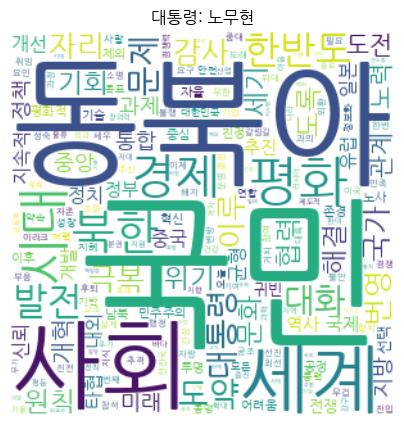

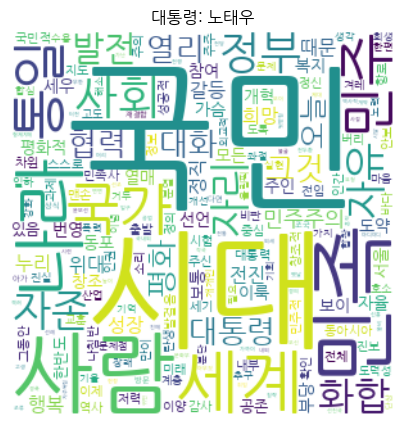

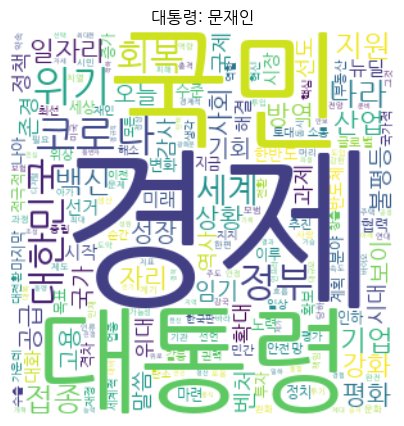

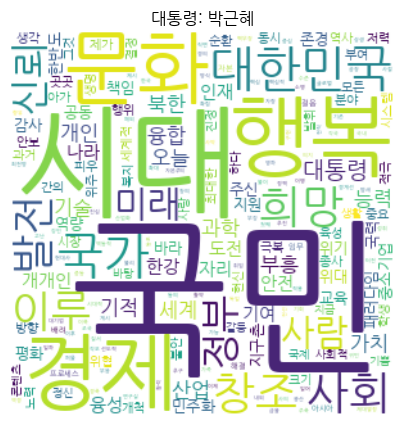

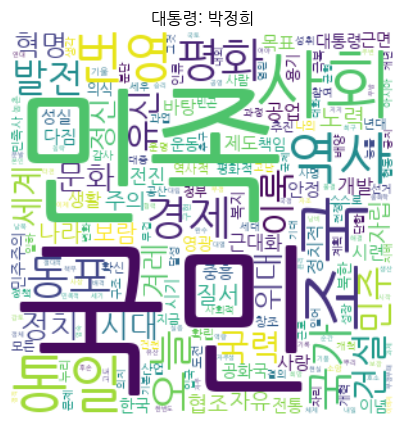

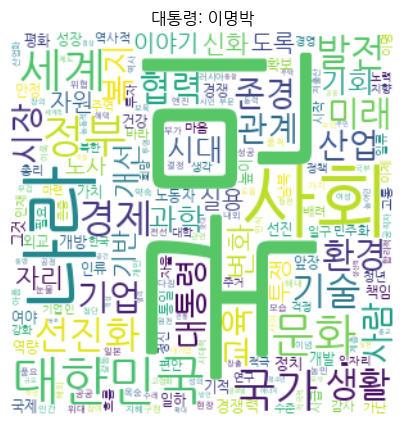

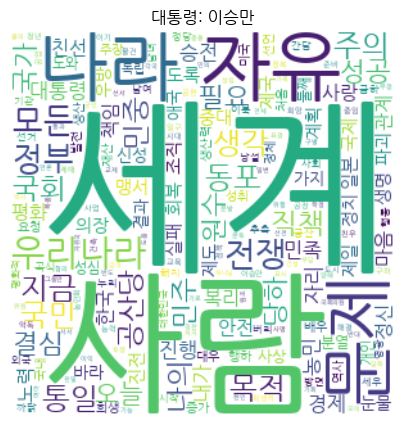

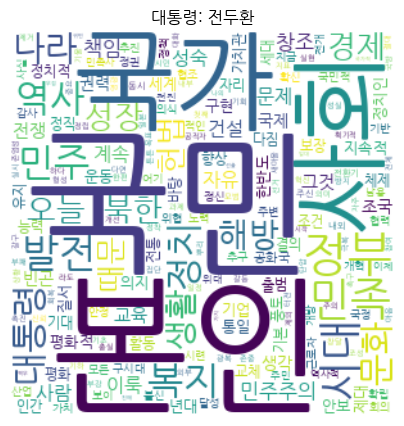

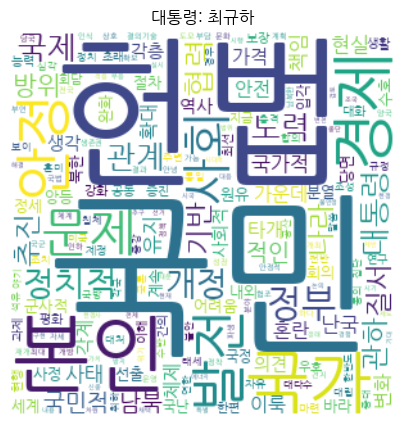

In [65]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


font_path = '/content/drive/MyDrive/Colab Notebooks/23_2se_textmining/teamproject/3.NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name)

for president, top_nouns in top_nouns_by_president.items():
    # 워드클라우드 설정
    wc = WordCloud(
        font_path=font_path,  # 폰트 경로
        background_color='white',  # 배경색 설정
        width=300,
        height=300
    )

    # 워드클라우드 생성
    wordcloud = wc.generate_from_frequencies(dict(top_nouns))

    # 그래프 설정 및 표시
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'대통령: {president}')
    plt.axis('off')
    plt.show()

대통령: 김대중
단어: 국민, 빈도: 28
단어: 경제, 빈도: 24
단어: 정부, 빈도: 23
단어: 혁명, 빈도: 12
단어: 사회, 빈도: 12
단어: 기업, 빈도: 12
단어: 시대, 빈도: 11
단어: 협력, 빈도: 10
단어: 남북, 빈도: 10
단어: 오늘, 빈도: 9
단어: 발전, 빈도: 9
단어: 세기, 빈도: 9
단어: 나라, 빈도: 9
단어: 극복, 빈도: 9
단어: 개혁, 빈도: 8
단어: 산업, 빈도: 7
단어: 세계, 빈도: 7
단어: 시장, 빈도: 7
단어: 문화, 빈도: 7
단어: 교류, 빈도: 7
--------------------------------------------------
대통령: 김영삼
단어: 국민, 빈도: 19
단어: 민족, 빈도: 15
단어: 사회, 빈도: 12
단어: 시대, 빈도: 9
단어: 정부, 빈도: 8
단어: 세계, 빈도: 8
단어: 한국, 빈도: 7
단어: 사람, 빈도: 7
단어: 정치, 빈도: 7
단어: 자유, 빈도: 6
단어: 통일, 빈도: 6
단어: 일하, 빈도: 6
단어: 자리, 빈도: 5
단어: 오늘, 빈도: 5
단어: 신한, 빈도: 5
단어: 창조, 빈도: 5
단어: 나라, 빈도: 5
단어: 개혁, 빈도: 5
단어: 국가, 빈도: 5
단어: 동포, 빈도: 4
--------------------------------------------------
대통령: 노무현
단어: 국민, 빈도: 21
단어: 동북아, 빈도: 19
단어: 사회, 빈도: 18
단어: 세계, 빈도: 16
단어: 평화, 빈도: 16
단어: 시대, 빈도: 16
단어: 경제, 빈도: 13
단어: 북한, 빈도: 12
단어: 한반도, 빈도: 12
단어: 발전, 빈도: 11
단어: 대화, 빈도: 9
단어: 대통령, 빈도: 8
단어: 도약, 빈도: 8
단어: 문제, 빈도: 8
단어: 자리, 빈도: 7
단어: 감사, 빈도: 7
단어: 극복, 빈도: 7
단어: 이루, 빈도: 7
단어: 국가, 빈도: 7
단어: 번영, 빈도: 7
------

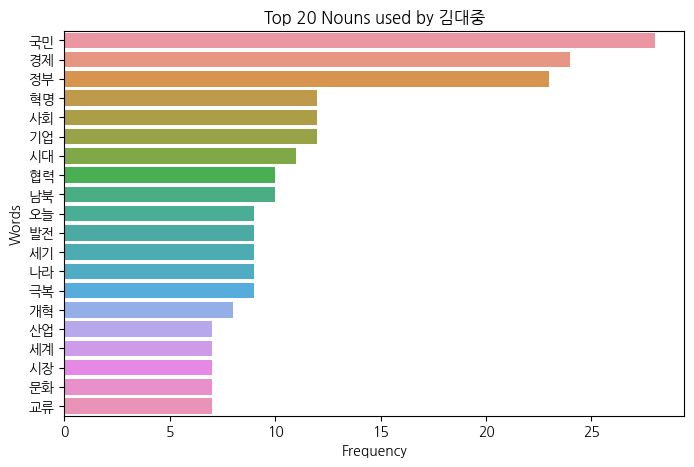

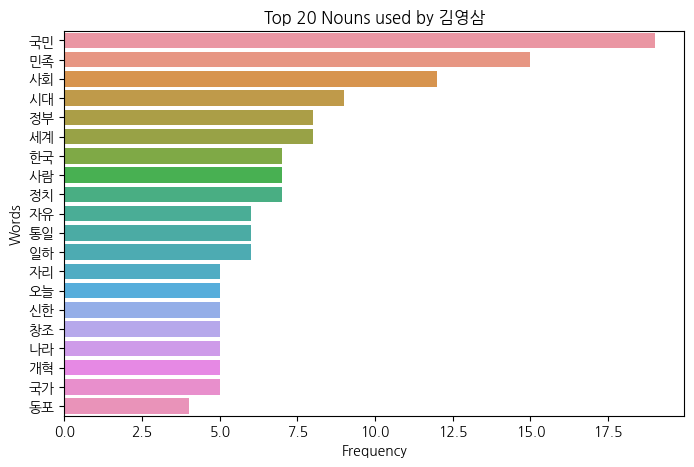

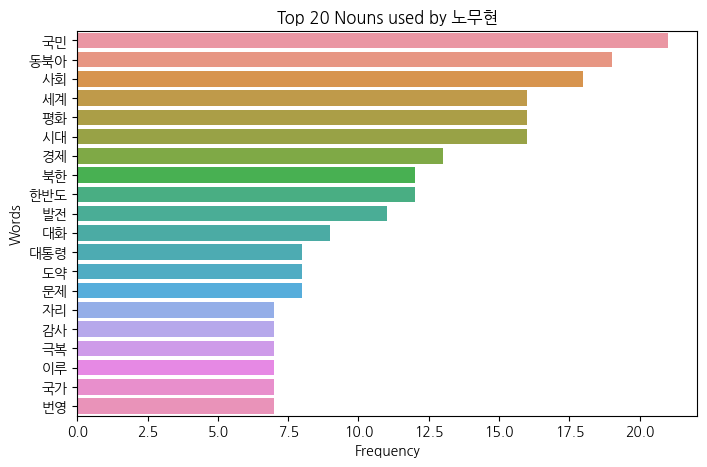

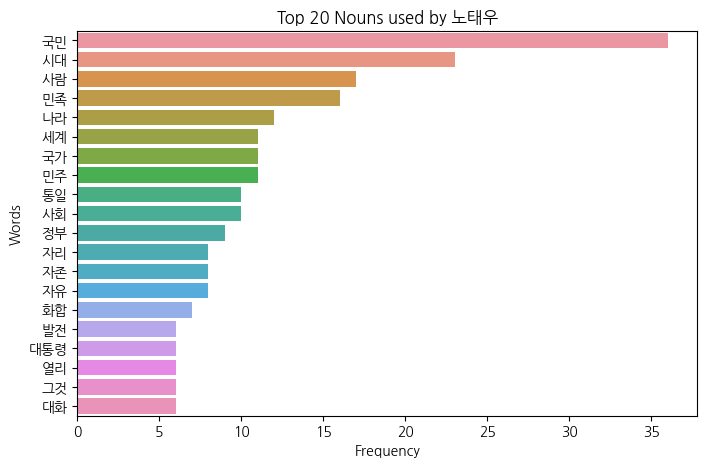

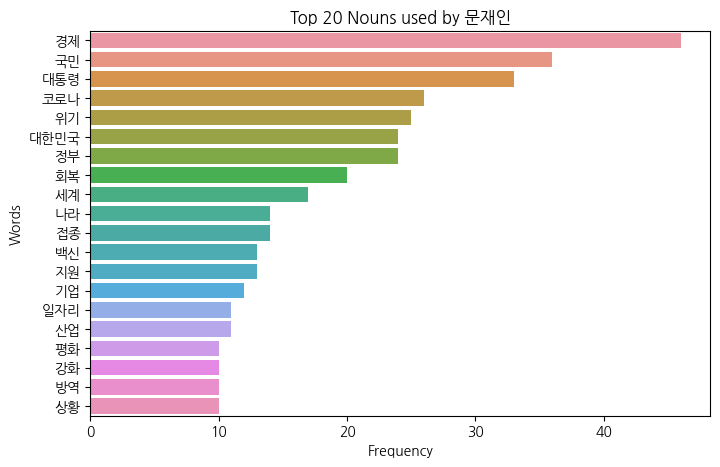

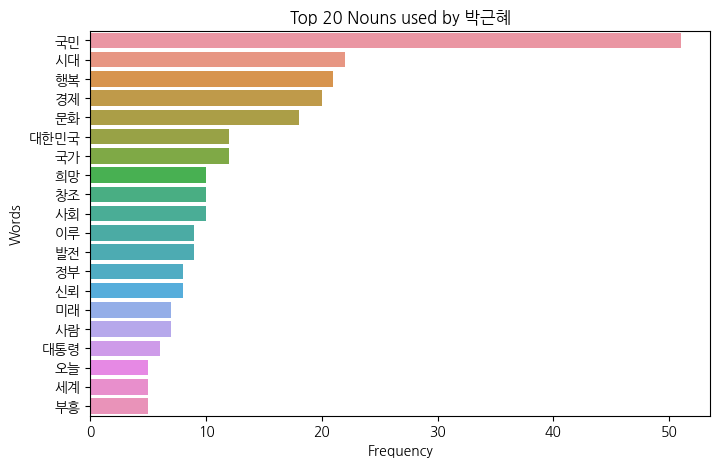

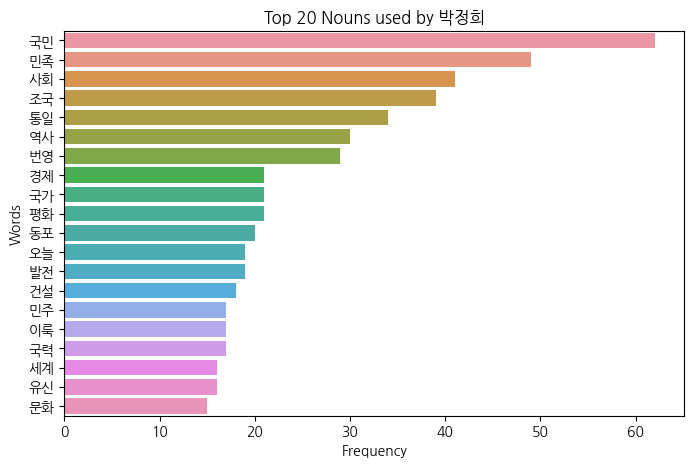

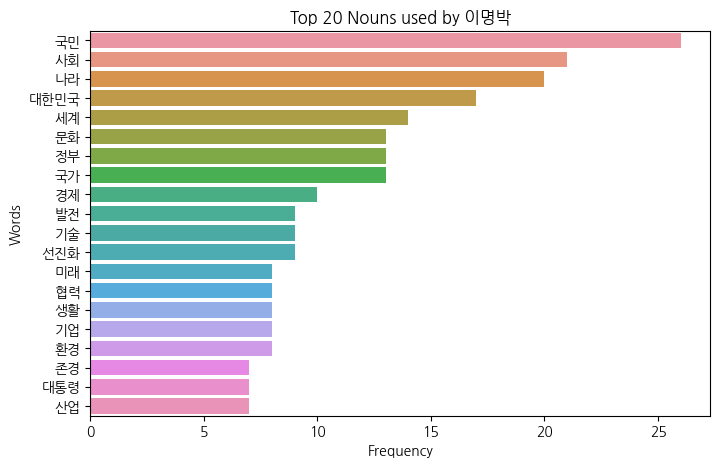

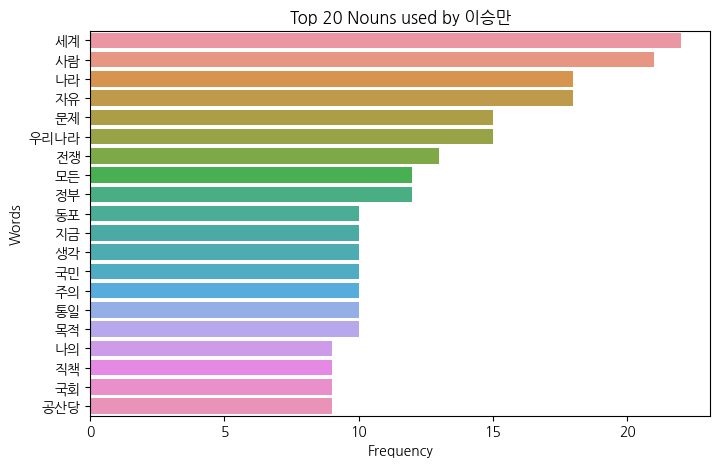

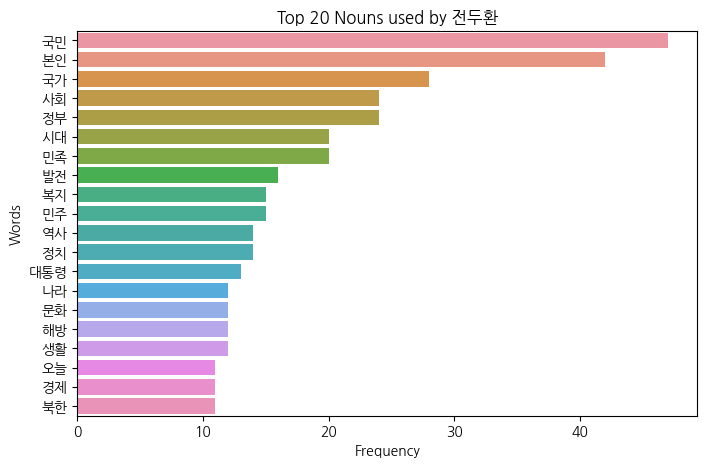

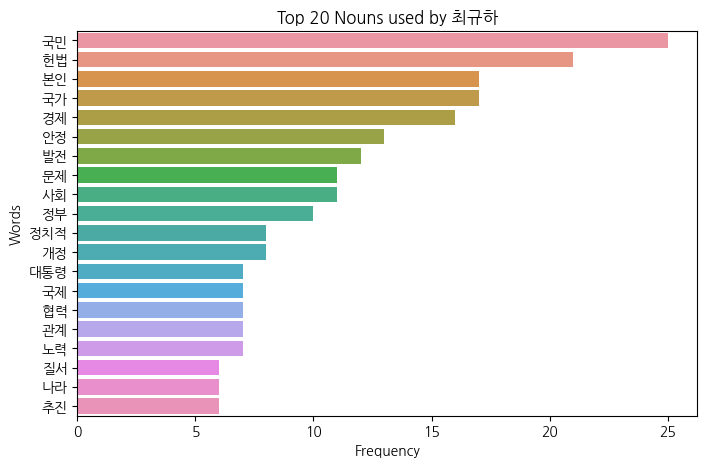

In [66]:
top_20_nouns_by_president = {}

# 각 대통령별로 'N'으로 시작하는 품사의 토큰만 상위 20개 선택
for president, sorted_pos_counts in pos_frequencies.items():
    top_20_nouns = [(token, freq) for (token, pos), freq in sorted_pos_counts if pos.startswith('N')][:20]
    top_20_nouns_by_president[president] = top_20_nouns

# 결과 출력
for president, top_nouns in top_20_nouns_by_president.items():
    print(f'대통령: {president}')
    for token, freq in top_nouns:
        print(f'단어: {token}, 빈도: {freq}')
    print('-' * 50)  # 구분선

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import seaborn as sns

path = '/content/drive/MyDrive/Colab Notebooks/23_2se_textmining/teamproject/3.NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=5)
plt.rc('font', family='NanumGothic')


for president, top_nouns in top_20_nouns_by_president.items():
    plt.figure(figsize=(8, 5))  # 그래프 크기 설정

    # 데이터 분리
    words, frequencies = zip(*top_nouns)

    # 그래프 그리기
    sns.barplot(x=list(frequencies), y=list(words))
    plt.title(f"Top 20 Nouns used by {president}")  # 제목 설정
    plt.xlabel('Frequency')  # x축 라벨 설정
    plt.ylabel('Words')      # y축 라벨 설정
    plt.show()

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# TF-IDF 벡터화 객체 생성
tfidf_vectorizer = TfidfVectorizer()

# 대통령별로 연설문을 하나의 문자열로 결합
documents = []
presidents = []

for president, token_lists in tokenized_data.items():
    text = " ".join([" ".join(doc) for doc in token_lists])
    documents.append(text)
    presidents.append(president)

# TF-IDF 벡터 생성
tfidf_vectors = tfidf_vectorizer.fit_transform(documents)

#코사인 유사도
cosine_similarities = cosine_similarity(tfidf_vectors, tfidf_vectors)

# 결과 확인
for i, president1 in enumerate(tokenized_data.keys()):
    for j, president2 in enumerate(tokenized_data.keys()):
        if i < j:
            similarity = cosine_similarities[i][j]
            print(f'코사인 유사도 (대통령 {president1} vs. 대통령 {president2}): {similarity}')

코사인 유사도 (대통령 김대중 vs. 대통령 김영삼): 0.6943578951118797
코사인 유사도 (대통령 김대중 vs. 대통령 노무현): 0.7437997098621272
코사인 유사도 (대통령 김대중 vs. 대통령 노태우): 0.6622622205715144
코사인 유사도 (대통령 김대중 vs. 대통령 문재인): 0.6513047022651443
코사인 유사도 (대통령 김대중 vs. 대통령 박근혜): 0.6557032095117726
코사인 유사도 (대통령 김대중 vs. 대통령 박정희): 0.5095531368478836
코사인 유사도 (대통령 김대중 vs. 대통령 이명박): 0.726755501733769
코사인 유사도 (대통령 김대중 vs. 대통령 이승만): 0.3486563915526259
코사인 유사도 (대통령 김대중 vs. 대통령 전두환): 0.5538357542197567
코사인 유사도 (대통령 김대중 vs. 대통령 최규하): 0.5355796638121033
코사인 유사도 (대통령 김영삼 vs. 대통령 노무현): 0.7355404575900502
코사인 유사도 (대통령 김영삼 vs. 대통령 노태우): 0.7584940777844787
코사인 유사도 (대통령 김영삼 vs. 대통령 문재인): 0.5286752506514778
코사인 유사도 (대통령 김영삼 vs. 대통령 박근혜): 0.6300326961972731
코사인 유사도 (대통령 김영삼 vs. 대통령 박정희): 0.6228391776999201
코사인 유사도 (대통령 김영삼 vs. 대통령 이명박): 0.7606351077435762
코사인 유사도 (대통령 김영삼 vs. 대통령 이승만): 0.45107455455454065
코사인 유사도 (대통령 김영삼 vs. 대통령 전두환): 0.6366192533911105
코사인 유사도 (대통령 김영삼 vs. 대통령 최규하): 0.5174812249916013
코사인 유사도 (대통령 노무현 vs. 대통령 노태우): 0.6955501850153986


In [72]:
# 유클리디안 유사도 계산
euclidean_dists = euclidean_distances(tfidf_vectors, tfidf_vectors)

# 결과 확인
for i, president1 in enumerate(tokenized_data.keys()):
    for j, president2 in enumerate(tokenized_data.keys()):
        if i < j:
            euclidean_distance_value = euclidean_dists[i][j]
            print(f'유클리디안 유사도 (대통령 {president1} vs. 대통령 {president2}): {euclidean_distance_value}')

유클리디안 유사도 (대통령 김대중 vs. 대통령 김영삼): 0.781846666409879
유클리디안 유사도 (대통령 김대중 vs. 대통령 노무현): 0.7158216120485229
유클리디안 유사도 (대통령 김대중 vs. 대통령 노태우): 0.8218732012037937
유클리디안 유사도 (대통령 김대중 vs. 대통령 문재인): 0.8350991530768741
유클리디안 유사도 (대통령 김대중 vs. 대통령 박근혜): 0.8298153896960788
유클리디안 유사도 (대통령 김대중 vs. 대통령 박정희): 0.9904007907429375
유클리디안 유사도 (대통령 김대중 vs. 대통령 이명박): 0.7392489408395946
유클리디안 유사도 (대통령 김대중 vs. 대통령 이승만): 1.1413532393149586
유클리디안 유사도 (대통령 김대중 vs. 대통령 전두환): 0.944631405131382
유클리디안 유사도 (대통령 김대중 vs. 대통령 최규하): 0.963763805284155
유클리디안 유사도 (대통령 김영삼 vs. 대통령 노무현): 0.7272682344361672
유클리디안 유사도 (대통령 김영삼 vs. 대통령 노태우): 0.6949905354974575
유클리디안 유사도 (대통령 김영삼 vs. 대통령 문재인): 0.9709013846406056
유클리디안 유사도 (대통령 김영삼 vs. 대통령 박근혜): 0.8601945173072506
유클리디안 유사도 (대통령 김영삼 vs. 대통령 박정희): 0.8685169224604448
유클리디안 유사도 (대통령 김영삼 vs. 대통령 이명박): 0.6919030166958718
유클리디안 유사도 (대통령 김영삼 vs. 대통령 이승만): 1.0477837996890957
유클리디안 유사도 (대통령 김영삼 vs. 대통령 전두환): 0.8525030751954986
유클리디안 유사도 (대통령 김영삼 vs. 대통령 최규하): 0.982363247488829
유클리디안 유사도 (대통령 노

In [76]:
# 코사인 유사도 최대, 유클리디안 유사도 최대(거리 최소) 인 조합
import numpy as np

# 대통령 이름 목록
president_names = list(tokenized_data.keys())

# 가장 높은 코사인 유사도 찾기
max_cosine_similarity = 0
max_cosine_similarity_pair = None

for i in range(len(president_names)):
    for j in range(i + 1, len(president_names)):
        if cosine_similarities[i][j] > max_cosine_similarity:
            max_cosine_similarity = cosine_similarities[i][j]
            max_cosine_similarity_pair = (president_names[i], president_names[j])


# 가장 높은 유클리디안 유사도 찾기
min_euclidean_distance = np.inf
min_euclidean_distance_pair = None

for i in range(len(president_names)):
    for j in range(i + 1, len(president_names)):
        if euclidean_dists[i][j] < min_euclidean_distance:
            min_euclidean_distance = euclidean_dists[i][j]
            min_euclidean_distance_pair = (president_names[i], president_names[j])


print(f'코사인 유사도 최대: {max_cosine_similarity} {max_cosine_similarity_pair[0]} vs {max_cosine_similarity_pair[1]}')
print(f'유클리디안 거리 최소: {min_euclidean_distance} {min_euclidean_distance_pair[0]} vs {min_euclidean_distance_pair[1]}')

코사인 유사도 최대: 0.7744090119060246 박정희 vs 전두환
유클리디안 거리 최소: 0.6717008085360278 박정희 vs 전두환


In [51]:
##################